# Iris data in-class exercises for PCA analysis

1.  Load in the iris data 
2.  Using seaborn make a pairplot of the iris data
3.  Adding color according to the type of iris, plot the iris data using the more promising pairs of measurements.
2.  Do a principle components analysis of the iris data using sklearn
3.  Make a bar chart to show how much of the explained variance is explained by each of the princple components
4.  Make a scatter plot of the first princple components showing the first dimenstion as a line. Add color to this scatter plot according to the kind of iris.
5.  Make a scatter plot of the first two principle components again with color for each component
6.  Make a 3-d scatter plot with color to show the first 3 components.


```
pca = PCA(n_components=2)
x = pca.fit_transform(data)
plt.figure(figsize = (5,5))
plt.scatter(x[:,0],x[:,1])    # first two dimensions
plt.show()
```


In [1]:
import pandas as pd
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
import math
from sklearn.decomposition import PCA



In [2]:
iris = pd.read_csv('../Data/iris.csv',header=None)

In [3]:
iris.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


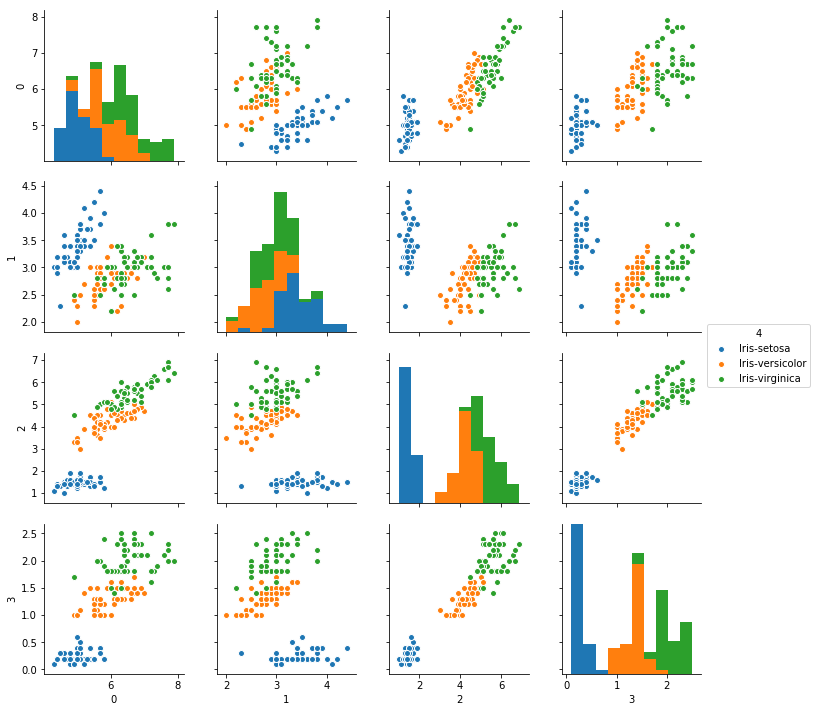

In [4]:
sns.pairplot(iris,hue=4)

In [5]:
IX = iris.iloc[:,0:4]
y = iris.iloc[:,4]

In [6]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
cm = {'Iris-setosa':'r', 'Iris-virginica':'g', 'Iris-versicolor':'b'}
colormap = y.map(lambda x: cm[x])

In [8]:
pca = PCA(n_components=2)
res = pca.fit_transform(IX)

In [20]:
res[0:5,0:3]

array([[-2.68420713,  0.32660731, -0.02151184],
       [-2.71539062, -0.16955685, -0.20352143],
       [-2.88981954, -0.13734561,  0.02470924],
       [-2.7464372 , -0.31112432,  0.03767198],
       [-2.72859298,  0.33392456,  0.0962297 ]])

In [21]:
res[0:5,0]

array([-2.68420713, -2.71539062, -2.88981954, -2.7464372 , -2.72859298])

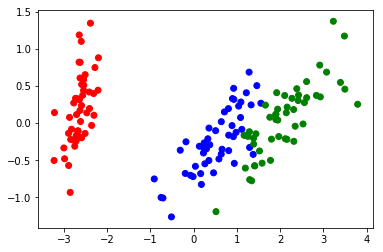

In [9]:
plt.scatter(res[:,0],res[:,1],c=colormap)

<Container object of 2 artists>

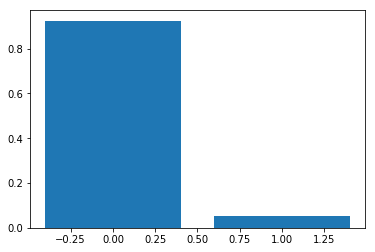

In [10]:
plt.bar(range(len(pca.explained_variance_)),pca.explained_variance_ratio_)

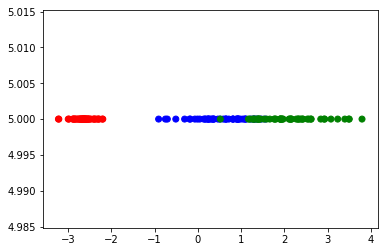

In [11]:
plt.scatter(res[:,0],[5]*len(res),c=colormap)

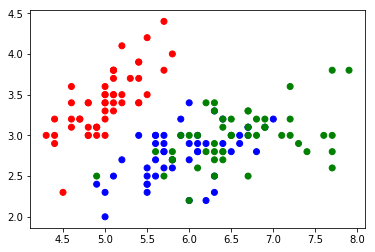

In [12]:
plt.scatter(IX.values[:,0],IX.values[:,1],c=colormap)

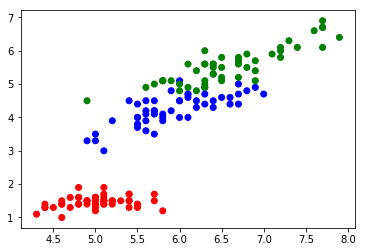

In [13]:
plt.scatter(IX.values[:,0],IX.values[:,2],c=colormap)


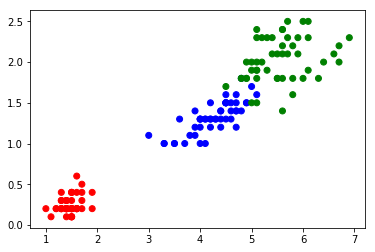

In [14]:
plt.scatter(IX.values[:,2], IX.values[:,3],c=colormap)


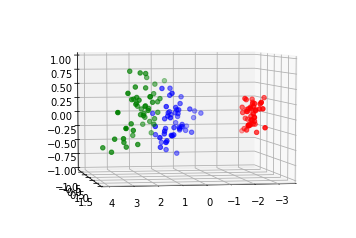

In [15]:
pca = PCA(n_components=3)
res = pca.fit_transform(IX)

fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')
ax.set_zlim(-1,1)
ax.scatter(res[:,0], res[:,1], res[:,2], c=colormap)
ax.view_init(5,80)